# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely \
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely L. Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

First, the necessary library was imported then the function and the integration limits were defined.

In [57]:
import numpy as np

# This is the function we want to integrate
def f(x):
    return 2*x**4 + 3*x**2 +4*x + 5
# Defining the integration limits
a = 0.0 
b = 5.0 

For the Trapezoidal rule, the formulas given in the book were followed and used in the algorithm.

In [58]:
# Implementing the trapezoidal rule
def integ_trap(N, a, b):
  h= (b-a)/N
  
  s = 0.5*f(a) + 0.5*f(b) # Initial value
  for k in range(1,N):
      s += f(a+k*h)
  s = s*h
  return(s)

# Getting estimated integrals for different values of N
N_arr = np.array([10, 100, 1000]) 
pct_err = np.zeros(len(N_arr))
s_arr = np.zeros(len(N_arr))

# Defining the xact value of the integral, computed analytically
I_exact = 1450.0 

# Applying for loop to evaluate the integral
for i in np.arange(len(N_arr)):
  s_arr[i] = integ_trap(N_arr[i], a, b)
  # Computing for the percent error of the resulting values
  pct_err[i] = np.abs(1- s_arr[i]/I_exact)*100
  
  print("N =",N_arr[i], ", Estimate=",s_arr[i], ", Percent error =",pct_err[i])

N = 10 , Estimate= 1471.4375 , Percent error = 1.4784482758620765
N = 100 , Estimate= 1450.2145812500003 , Percent error = 0.014798706896579361
N = 1000 , Estimate= 1450.0021458331234 , Percent error = 0.00014798849126140823


As we can see from the results using the Trapezoidal rule: at $ N = 10 $, the percent error is $ 1.4784482758620765 $, at $ N = 100 $, it's $ 0.014798706896579361 $, and at $ N = 1000 $, it's $ 0.00014798849126140823 $. Hence, the larger the number of slices ($N$), the smaller the percent error becomes, giving us a better approximation of the integral or the area under the curve.

For the Simpson's rule, the formulas given in the book were also followed and used in the algorithm.

In [35]:
# Implementing the Simpson's rule
def integ_simp(N, a, b):
  h = (b-a)/N

  s = f(a) + f(b)
  # Looping over the odd values of k
  for k in range(1,N,2): 
      s += 4*f(a+k*h)
  # Looping over the even values of k
  for k in range(2,N,2): 
      s += 2*f(a+k*h)
  s = s*(1./3)*h
  return(s)

# Getting estimated integrals for different values of N
N_arr = np.array([10, 100, 1000])
s_arr = np.zeros(len(N_arr))
pct_err = np.zeros(len(N_arr))
I_exact = 1450.0

# Applying for loop to evaluate the integral
for i in np.arange(len(N_arr)):
  s_arr[i] = integ_simp(N_arr[i], a, b)
  pct_err[i] = np.abs(1- s_arr[i]/I_exact)*100
  
  # Printing the results
  print("N =",N_arr[i], ", Estimate=",s_arr[i], ", Percent error =",pct_err[i])


N = 10 , Estimate= 1450.0833333333333 , Percent error = 0.005747126436772554
N = 100 , Estimate= 1450.0000083333337 , Percent error = 5.747126552435589e-07
N = 1000 , Estimate= 1450.0000000008342 , Percent error = 5.753175713607561e-11


From the results using the Simpson's rule: at $ N = 10 $, the percent error is $ 0.005747126436772554 $, at $ N = 100 $, it's $ 5.747126552435589 \times 10^{-07} $, and at $ N = 1000 $, it's $ 5.753175713607561 \times 10^{-11} $. Here, the larger the number of slices ($N$), the smaller the percent error also becomes.

But comparing this to that of the Trapezoidal rule, Simpson's rule returned a better approximation of the integral with the same number of slices, proving its superiority in terms of accuracy over the Trapezoidal rule.

### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} dx $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [1]:
from math import sin, sqrt
import numpy as np
import pandas as pd

def f(x):
    return sin(10 * sqrt(x))**2

def atrap(a, b, N):
    h = (b - a) / N
    return h * ((0.5 * (f(a) + f(b))) + sum([f(a + i * h) for i in range(1, N)]))


N = 1  # step size
err_atrap = 1

atrap_out = []
while err_atrap > 10**-6:  
    I_0 = atrap(0, 1, N)
    N *= 2
    I_atrap = atrap(0, 1, N)
    err_atrap = abs(1/3 * (I_atrap - I_0))
    col = {'N': N,
           'Integral': I_atrap,
           'Atrap_error': err_atrap}
    atrap_out.append(col)

    df1 = pd.DataFrame(atrap_out)
print(df1)

       N  Integral   Atrap_error
0      2  0.325232  5.908414e-02
1      4  0.512283  6.235031e-02
2      8  0.402997  3.642847e-02
3     16  0.430103  9.035307e-03
4     32  0.448415  6.103765e-03
5     64  0.453913  1.832755e-03
6    128  0.455349  4.785244e-04
7    256  0.455711  1.209207e-04
8    512  0.455802  3.031107e-05
9   1024  0.455825  7.582827e-06
10  2048  0.455831  1.896023e-06
11  4096  0.455832  4.740255e-07


In [2]:
from __future__ import division, print_function
from numpy import empty

def f(x):
    return sin(sqrt(100*x))**2

a = 0
b = 1

def resum(f,a,b,N):
	h = (b - a)/N

	s = 0
	for k in range(1,N//2+1):
		s+=f(a + (2*k-1)*h)
	
	return s*h

I_rom = (b-a)/2*(f(b)+f(a))
err_rom = 1
N = 1

R = empty((100,100))
R[0,0] = I_rom
i = 0

rom_out = []
while err_rom>1e-6:

	N *= 2
	i += 1
	
	I_old = R[i-1,0]
	I_new = I_old/2 + resum(f,a,b,N)
	#err_rom = abs(I_rom-I_new)/3
	#I_rom = I_new
	
	R[i,0] = I_new
	s = '\t'
	s += '{0:.7f}'.format(R[i,0])
	for m in range(i):
		R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
		s += ' {0:.7f}'.format(R[i,m])
	
	err_rom = abs(R[i,m+1]-R[i-1,m])
	I_rom = R[i,m+1]
	col = {'N': N,
           'Integral': I_rom,
           'Rom_error': err_rom}
	rom_out.append(col)

	df2 = pd.DataFrame(rom_out)
print(df2)


     N  Integral     Rom_error
0    2  0.384316  2.363366e-01
1    4  0.587321  2.030049e-01
2    8  0.348974  2.383471e-01
3   16  0.445804  9.682990e-02
4   32  0.455777  9.973728e-03
5   64  0.455832  5.500223e-05
6  128  0.455833  3.784363e-08


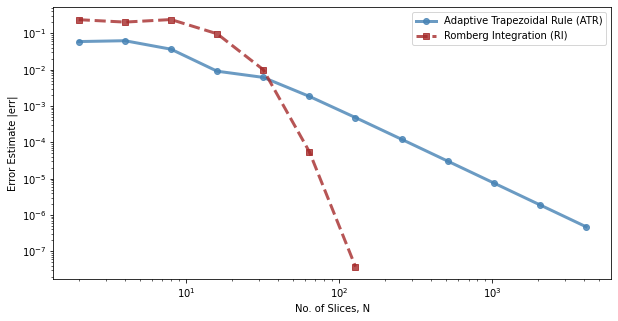

In [17]:
# Importing the necessary libraries for plotting
import matplotlib.pyplot as plt

# Plotting the dataframes
plt.plot(df1.N, df1.Atrap_error, color='steelblue', label='Adaptive Trapezoidal Rule (ATR)', linewidth=3, marker='o', alpha=0.8) 
plt.plot(df2.N, df2.Rom_error, color='brown', label='Romberg Integration (RI)', linewidth=3, linestyle = 'dashed', marker='s', alpha=0.8) 

# Setting the axes labels
plt.xlabel('No. of Slices, N') 
plt.ylabel('Error Estimate |err|') 

# Showing the legend
plt.legend() 

# Scaling the axes
plt.xscale('log')
plt.yscale('log')

# Displaying the plot
plt.show()

make for loop that computes N=1, then it has to loop by 2 until it reaches the best approximation of 10^-6 (4096 and dulo)

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In order to define the function $\tt gaussxw$, the file gaussxw.py was first loaded in the same folder as this notebook.

In [70]:
# Define gaussxw
from gaussxw import gaussxw

The integrand was then defined as well as the bounds and number of slices. Next, the sample points and weight were calculated and mapped to the general domain using the formula given in the book. Finally, the integration was perfomed.

In [71]:
# Defining the function to be evaluated
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5
    
a = 0.0 # Lower bound
b = 5.0 # Upper bound
N = 3 # Number of slices

# Calculating the position and the weight, and mapping them to the required domain
x,w = gaussxw(N)
x_p = 0.5*(b-a)*x + 0.5*(b+a)
w_p = 0.5*(b-a)*w

# Performing the integration
s = 0.0
for i in range(N):
    s += w_p[i]*f(x_p[i])

print(s)

1450.000000000002


The resulting value of the integral is $1450.000000000002$.

There's also a faster way to integrate the given, which is using the scipy **integrate.quadrature()** method. Just for the sake of comparison, the integral was also evaluated using that method and their percent errors were computed to see the difference.

In [69]:
# Using the other method
from scipy import integrate

f = lambda x: 2*x**4 + 3*x**2 + 4*x + 5 
j = integrate.quadrature(f, 0.0, 5.0) # Calling the method
print(j)

# Calculating the percent error of both methods
I_exact = 1450
gauss = np.abs(1- s/I_exact)*100
sci = np.abs(1-j[0]/I_exact)*100 # We use index for j since it's a tuple

print("Guassian error: ", gauss)
print("Scipy error: ", sci)

(1449.9999999999998, 0.0)
Guassian error:  1.3322676295501878e-13
Scipy error:  1.1102230246251565e-14


From the resulting percent errors, the scipy **integrate.quadrature()** method was shown to be a bit more accurate. Although the difference are just very small.

### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_67405/1307048790.py:20: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/sqrt(E-V(xp))
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_67405/1307048790.py:21: RuntimeWarning: invalid value encountered in multiply
  s = sum(y*wp)


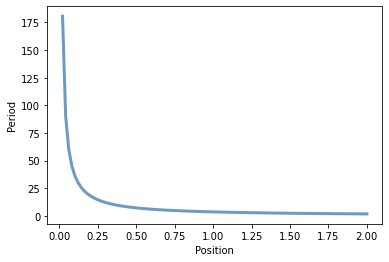

In [78]:
# Importing necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import linspace

# Defining the given potential, mass, and points
N = 20
m = 1
V = lambda x: x**4

x,w = gaussxw(N)

def T(a_):
	a = 0
	b = a_
	xp = 0.5*(b-a)*x + 0.5*(b+a)
	wp = 0.5*(b-a)*w
	E = V(a_)
	
	y = 1/sqrt(E-V(xp))
	s = sum(y*wp)

	return s*sqrt(8*m)
	
a = linspace(0,2,100)
periods = [T(ai) for ai in a]

# Graphing the period for amplitudes ranging from 0 to 2
plt.plot(a, periods, color='steelblue', linewidth=3, alpha=0.8) 
plt.xlabel('Position') # sets x axis label
plt.ylabel('Period') # sets y axis label
plt.show()


### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

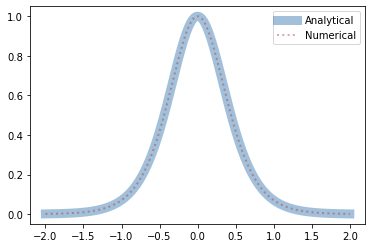

In [103]:
from numpy import linspace, tanh, cosh
from pylab import plot, show

h = 10**-5

#Defining the range
a = -2
b = 2

x = linspace(a, b, int((b - a) / h), endpoint=True)
y = 1 + 0.5 * tanh(2 * x)

# Numerical computation
derivative = []
for i in range(1, len(x) - 1):
    derivative.append((y[i+1] - y[i-1]) / (2 * h))

# Analytical computation
analytic = 1 / cosh(2 * x)**2

# Plotting the analytical and numerical values
plt.plot(x, analytic, color='steelblue', label='Analytical',linewidth=9, alpha=0.5) 
plt.plot(x[1:-1], derivative, color='brown', label='Numerical',linewidth=2, linestyle = 'dotted', alpha=0.4) 

# Displaying the plot and the legends
plt.legend()
plt.show()
